<a href="https://colab.research.google.com/github/yuanjinren/DS/blob/master/YuanjinRen_Unit2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Are financial indicators and stock values correlated? **

According to historical records, the average annual return of S&P 500 is approximately 10%–11% since its inception in 1926. However, is it possible to build up a machine learning model that can predict a specific stock's price will rise or fall in the next year based on last year's financial performance? In addition, is there a method which is able to predict stock price changes in the following year? 

In this research, I will use more than 200 financial indicators of US stocks from 2014 to 2018 to predict the price variance and the stock price trend in the following year. 

This dataset is from Kaggle: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018. In this dataset, The last column of the dataset represent the class of each stock, where: if the value of a stock increases during next year, then class=1; if the value of a stock decreases during next year, then class=0. The second-to-last column, PRICE VAR [%], lists the percent price variation of each stock for the next year. For example, percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).The columns PRICE VAR [%] and class make possible to use the datasets for both classification and regression tasks.

###Data Exploration

*Load Dataset*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import plotly
from plotly import __version__
print(plotly.__version__)

4.4.1


In [4]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [8]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [90]:
# Upload datasets and check their shape
pd.options.display.float_format = '{:,.0f}'.format
df_2014 = pd.read_csv('/content/drive/My Drive/Data/2014_Financial_Data.csv')
df_2015 = pd.read_csv('/content/drive/My Drive/Data/2015_Financial_Data.csv')
df_2016 = pd.read_csv('/content/drive/My Drive/Data/2016_Financial_Data.csv')
df_2017 = pd.read_csv('/content/drive/My Drive/Data/2017_Financial_Data.csv')
df_2018 = pd.read_csv('/content/drive/My Drive/Data/2018_Financial_Data.csv')

df_2014.shape,df_2015.shape,df_2016.shape,df_2017.shape,df_2018.shape

((3808, 225), (4120, 225), (4797, 225), (4960, 225), (4392, 225))

In [93]:
def wrangle(x):
  x.rename(columns={'Unnamed: 0':'Company Name'},inplace=True)
  x.replace(np.nan, 0)
  x.drop(x[x['Total assets'] ==0].index, inplace = True) 
  x.drop(x[x['Revenue'] ==0].index, inplace = True) 
  x['Total Asset Turnover Ratio'] = x['Revenue'] / x['Total assets']
  x['Gross Margin Ratio'] = x['Gross Margin'] / x['Revenue']
  x['Net Profit Ratio'] = x['Net Profit Margin']/x['Revenue']
  x['Return on Total Assets Ratio'] = x['Net Income']/x['Total assets']
  features = ['Company Name', 'currentRatio','quickRatio', 'Free Cash Flow margin','debtRatio', 'debtEquityRatio',
              'cashFlowToDebtRatio','Return on Tangible Assets','Total Asset Turnover Ratio',
              'Return on Total Assets Ratio','ROE','Gross Margin Ratio',
              'Net Profit Ratio', 'EPS','EPS Diluted','PE ratio', 'PB ratio','priceEarningsToGrowthRatio', 'Sector','Class']
  x = x[features]
  return x

In [97]:
df2018 = wrangle(df_2018)
df2018['2019StockPriceVar'] = df_2018['2019 PRICE VAR [%]']
df2017 = wrangle(df_2017)
df2017['2018StockPriceVar'] = df_2017['2018 PRICE VAR [%]']
df2016 = wrangle(df_2016)
df2016['2017StockPriceVar'] = df_2016['2017 PRICE VAR [%]']
df2015 = wrangle(df_2015)
df2015['2016StockPriceVar'] = df_2015['2016 PRICE VAR [%]']
df2014 = wrangle(df_2014)
df2014['2015StockPriceVar'] = df_2014['2015 PRICE VAR [%]']
df2018.shape, df2017.shape, df2016.shape, df2015.shape, df2014.shape

((4194, 21), (4756, 21), (4588, 21), (3940, 21), (3637, 21))

In [99]:
df_all = pd.concat([df2014,df2015,df2016,df2017,df2018], axis=0, sort=False).drop_duplicates()
df = df_all.drop(['2015StockPriceVar','2016StockPriceVar','2017StockPriceVar','2018StockPriceVar','2019StockPriceVar'], axis=1)
df.shape

(21115, 25)

(21115, 20)

In [101]:
df.head()

,Company Name,currentRatio,quickRatio,Free Cash Flow margin,debtRatio,debtEquityRatio,cashFlowToDebtRatio,Return on Tangible Assets,Total Asset Turnover Ratio,Return on Total Assets Ratio,ROE,Gross Margin Ratio,Net Profit Ratio,EPS,EPS Diluted,PE ratio,PB ratio,priceEarningsToGrowthRatio,Sector,Class
0,PG,1,1,0,0,1,0,1,1,0,0,0,0,4,4,19,3,16,Consumer Defensive,0
1,VIPS,0,1,0,0,2,1,0,1,0,0,0,0,0,0,82,nan,3,Consumer Defensive,0
2,KR,1,0,0,0,2,0,0,3,0,0,0,0,1,1,12,3,0,Consumer Defensive,1
3,RAD,2,0,0,1,-3,0,0,4,0,-0,0,0,5,5,29,0,0,Consumer Defensive,1
4,GIS,1,0,0,0,1,0,1,1,0,0,0,0,3,3,19,5,15,Consumer Defensive,1


*Peek at one dataset*

In [98]:
df2018.head()

,Company Name,currentRatio,quickRatio,Free Cash Flow margin,debtRatio,debtEquityRatio,cashFlowToDebtRatio,Return on Tangible Assets,Total Asset Turnover Ratio,Return on Total Assets Ratio,ROE,Gross Margin Ratio,Net Profit Ratio,EPS,EPS Diluted,PE ratio,PB ratio,priceEarningsToGrowthRatio,Sector,Class,2019StockPriceVar
0,CMCSA,1,1,0,0,2,0,0,0,0,0,0,0,3,3,13,2,13,Consumer Cyclical,1,33
1,KMI,1,1,0,0,1,0,0,0,0,0,0,0,1,1,23,1,21,Energy,1,41
2,INTC,2,1,0,0,0,1,0,1,0,0,0,0,5,4,10,3,10,Technology,1,30
3,MU,3,2,0,0,0,4,0,1,0,0,0,0,12,12,4,2,4,Technology,1,64
4,GE,2,1,0,0,3,0,nan,0,-0,-1,0,-0,-3,-3,0,2,nan,Industrials,1,45


In [102]:
df2018.describe()

,currentRatio,quickRatio,Free Cash Flow margin,debtRatio,debtEquityRatio,cashFlowToDebtRatio,Return on Tangible Assets,Total Asset Turnover Ratio,Return on Total Assets Ratio,ROE,Gross Margin Ratio,Net Profit Ratio,EPS,EPS Diluted,PE ratio,PB ratio,priceEarningsToGrowthRatio,Class,2019StockPriceVar
count,"3,951","3,952","3,945","3,948","3,948","3,430","3,096","4,044","4,044","3,943","4,147","4,022","4,130","4,132","3,947","3,404","2,712","4,194","4,194"
mean,3,3,-5,0,1,13,-0,1,-0,"2,817",0,-0,-73,-75,25,"31,894",47,1,21
std,30,51,97,0,14,756,6,2,2,"177,427",0,0,"5,854","5,826",108,"1,858,959",274,0,59
min,-1,0,"-4,822",-0,-251,"-15,767",-194,-0,-29,"-34,772",-0,-1,"-359,825","-359,825",0,0,0,0,-100
25%,1,1,-0,0,0,0,-0,0,-0,-0,0,-0,-0,-0,0,1,10,0,-6
50%,2,1,0,0,1,0,0,1,0,0,0,0,1,1,11,2,16,1,18
75%,3,2,0,0,1,1,0,1,0,0,0,0,2,2,21,3,28,1,40
max,"1,853","3,181",245,24,637,"32,750",143,114,113,"11,141,142",0,0,"101,641","95,231","3,842","108,458,749","9,704",1,"1,286"


In [103]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4391
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company Name                  4194 non-null   object 
 1   currentRatio                  3951 non-null   float64
 2   quickRatio                    3952 non-null   float64
 3   Free Cash Flow margin         3945 non-null   float64
 4   debtRatio                     3948 non-null   float64
 5   debtEquityRatio               3948 non-null   float64
 6   cashFlowToDebtRatio           3430 non-null   float64
 7   Return on Tangible Assets     3096 non-null   float64
 8   Total Asset Turnover Ratio    4044 non-null   float64
 9   Return on Total Assets Ratio  4044 non-null   float64
 10  ROE                           3943 non-null   float64
 11  Gross Margin Ratio            4147 non-null   float64
 12  Net Profit Ratio              4022 non-null   float64
 13  EPS

Takeaways:
4194 observations
21 columns(18 numeric(financial indicators),1 int(class column)
2 object(company name and sector)

Now, let's take a look at the distribution of the class values, and the distribution of the categorical variable Sector.

Datasets of other years can be explored in the same way. 

*Check number of companies with good increase or negative increase.*

In [104]:
low_rate = 0
high_rate =100
bottom = df2018[df2018['2019StockPriceVar'] < low_rate]
top = df2018[df2018['2019StockPriceVar'] > high_rate]

print(f'{len(bottom)} companies got negative increase in 2019.')
print(f'{len(top)} companies got more than {high_rate}% increase in 2019.')

1241 companies got negative increase in 2019.
190 companies got more than 100% increase in 2019.


Visualize the distribution of stock price increase in the next year
(get rid of outliers)

In [105]:
df_outlier = df2018.copy()
df_outlier.drop(df_outlier[df_outlier['2019StockPriceVar'] > 500].index, inplace = True) 

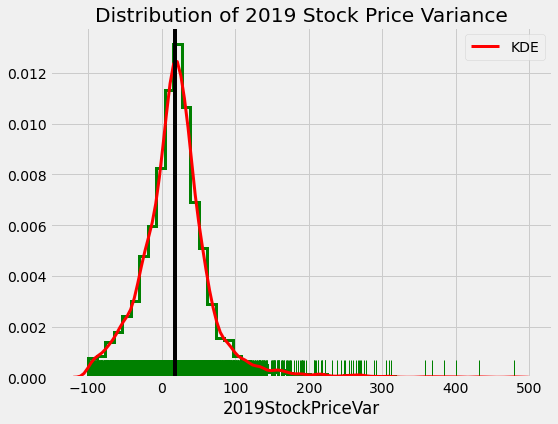

In [280]:
plt.figure(figsize=(8,6))
plt.title('Distribution of 2019 Stock Price Variance')
sns.distplot(df_outlier['2019StockPriceVar'],rug=True,rug_kws={"color": "g"},
             kde_kws={"color": "r", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
median = df_outlier['2019StockPriceVar'].median()
plt.axvline(median, color='k', linestyle='-');

Visualize the stock price variance based on sectors in general

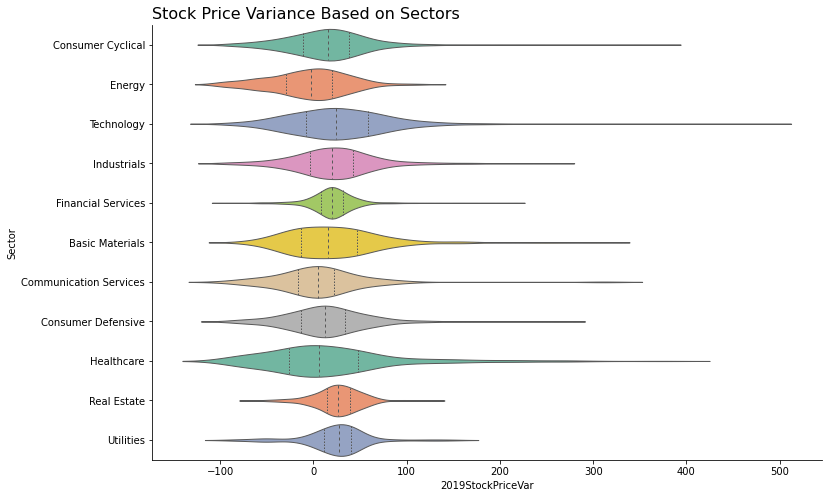

In [141]:
fig, ax = plt.subplots(1,figsize=(12,8))
sns.violinplot(x='2019StockPriceVar', y='Sector', data=df2018[df2018['2019StockPriceVar']<500], 
                    palette="Set2", split=True, 
                    scale="width", inner="quartile", linewidth=1)
sns.despine()
ax.set_title('Stock Price Variance Based on Sectors', loc='left', fontsize=16);

Takeaways: stock price variance median is approximately 20% in general, but it varies in different industries.

Visualize the relationship between next year stock price variances and some financial indicators by industries(get rid of outliers)

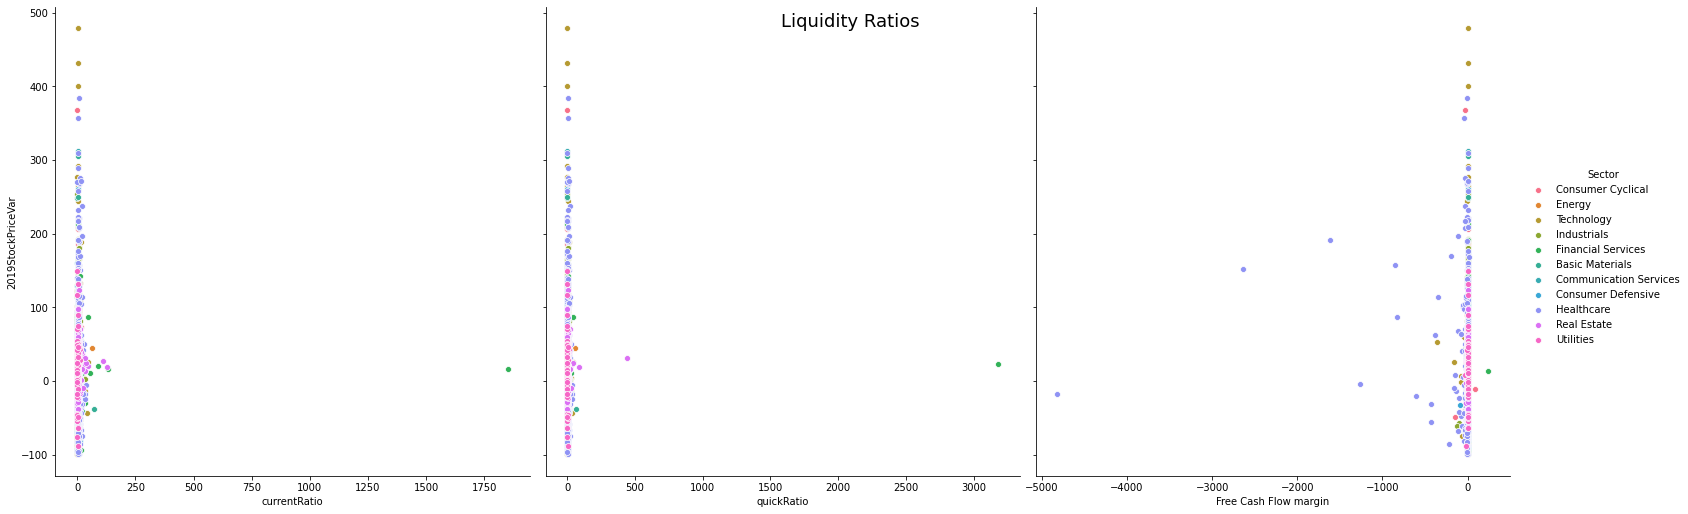

In [130]:
g1 = sns.pairplot(df_outlier,x_vars=['currentRatio','quickRatio','Free Cash Flow margin'], 
             y_vars='2019StockPriceVar',height=7, hue='Sector',palette='husl')
g1.fig.suptitle('Liquidity Ratios',fontsize=18);

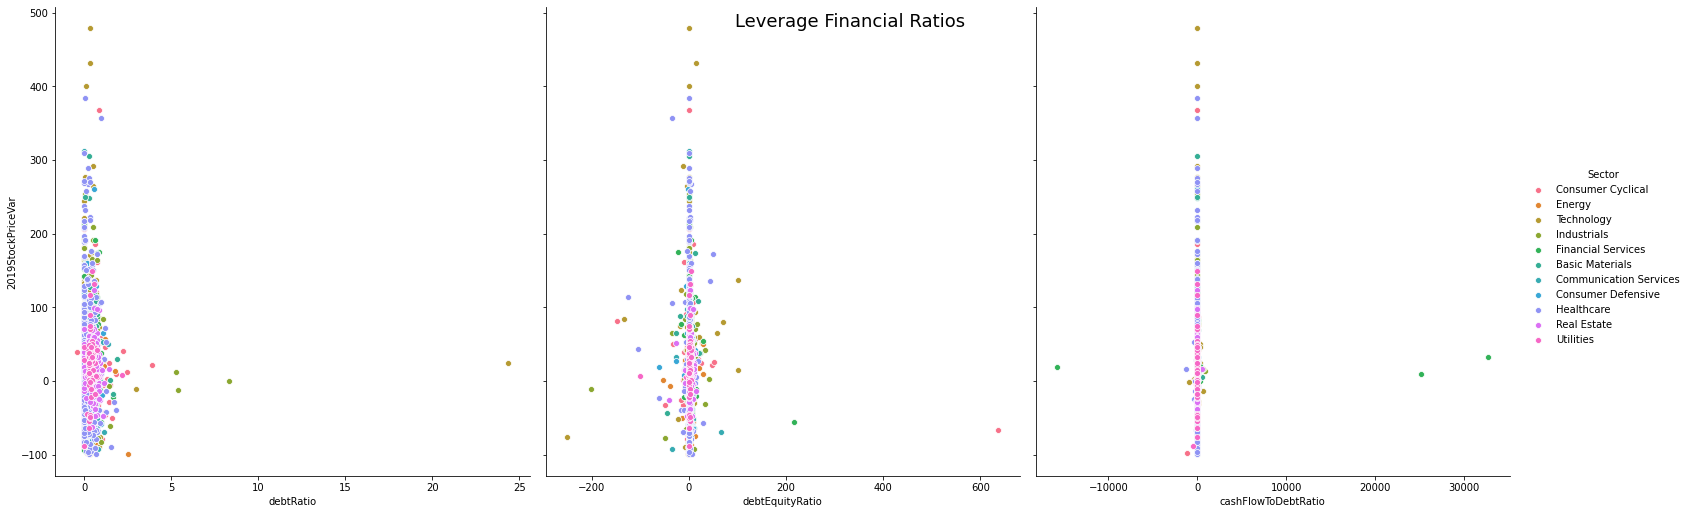

In [134]:
g2 = sns.pairplot(df_outlier,x_vars=['debtRatio','debtEquityRatio','cashFlowToDebtRatio'], 
             y_vars='2019StockPriceVar',height=7, hue='Sector',palette='husl')
g2.fig.suptitle('Leverage Financial Ratios',fontsize=18);

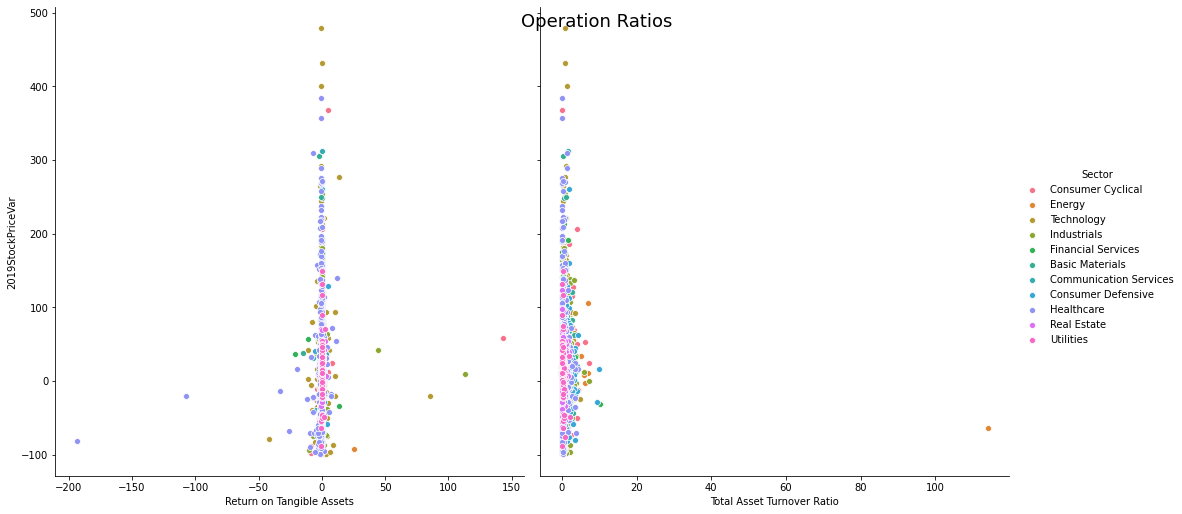

In [137]:
g3 = sns.pairplot(df_outlier,x_vars=['Return on Tangible Assets','Total Asset Turnover Ratio'], 
             y_vars='2019StockPriceVar',height=7, hue='Sector',palette='husl')
g3.fig.suptitle('Operation Ratios',fontsize=18);

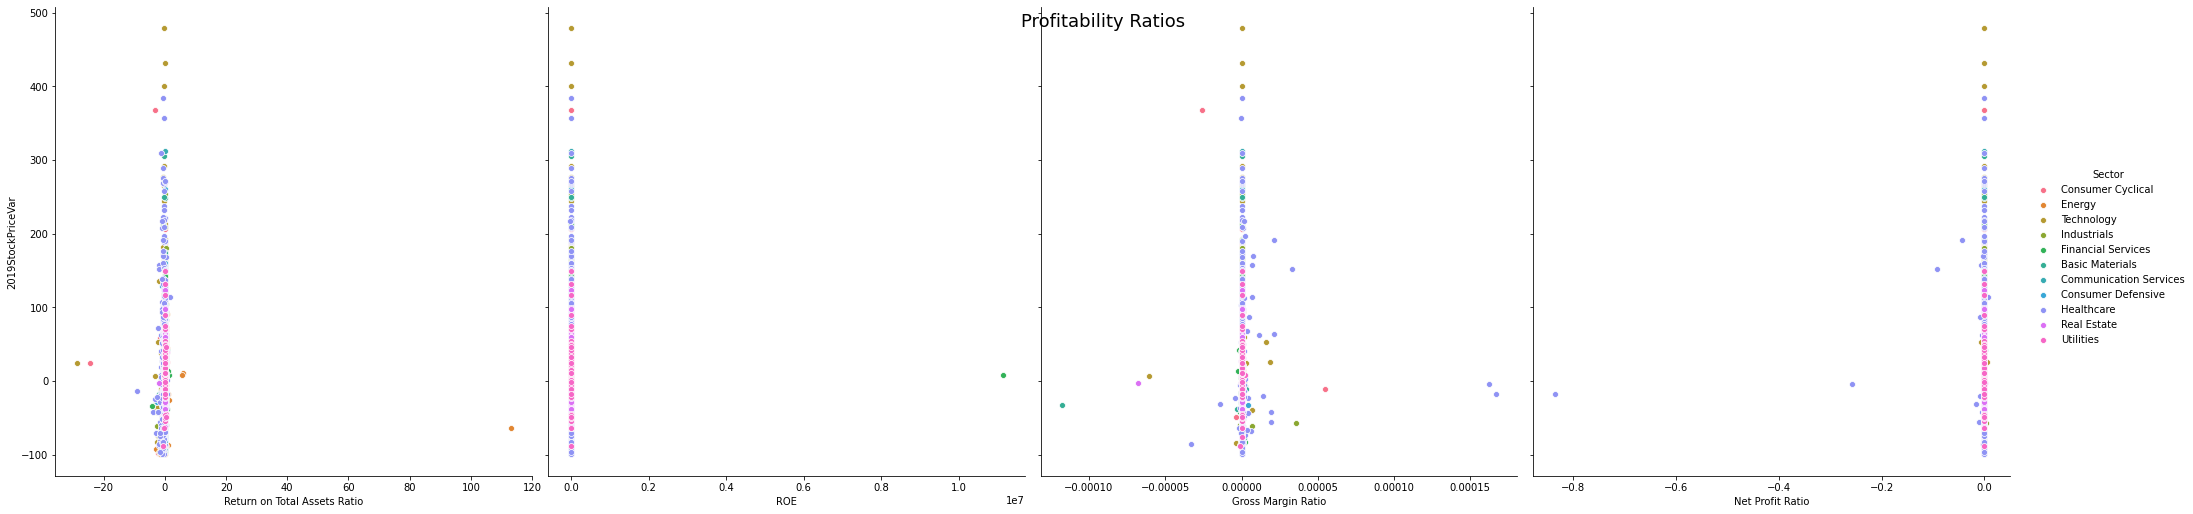

In [139]:
g4 = sns.pairplot(df_outlier,x_vars=['Return on Total Assets Ratio', 'ROE', 'Gross Margin Ratio', 'Net Profit Ratio'], 
             y_vars='2019StockPriceVar',height=7, hue='Sector',palette='husl')
g4.fig.suptitle('Profitability Ratios',fontsize=18);

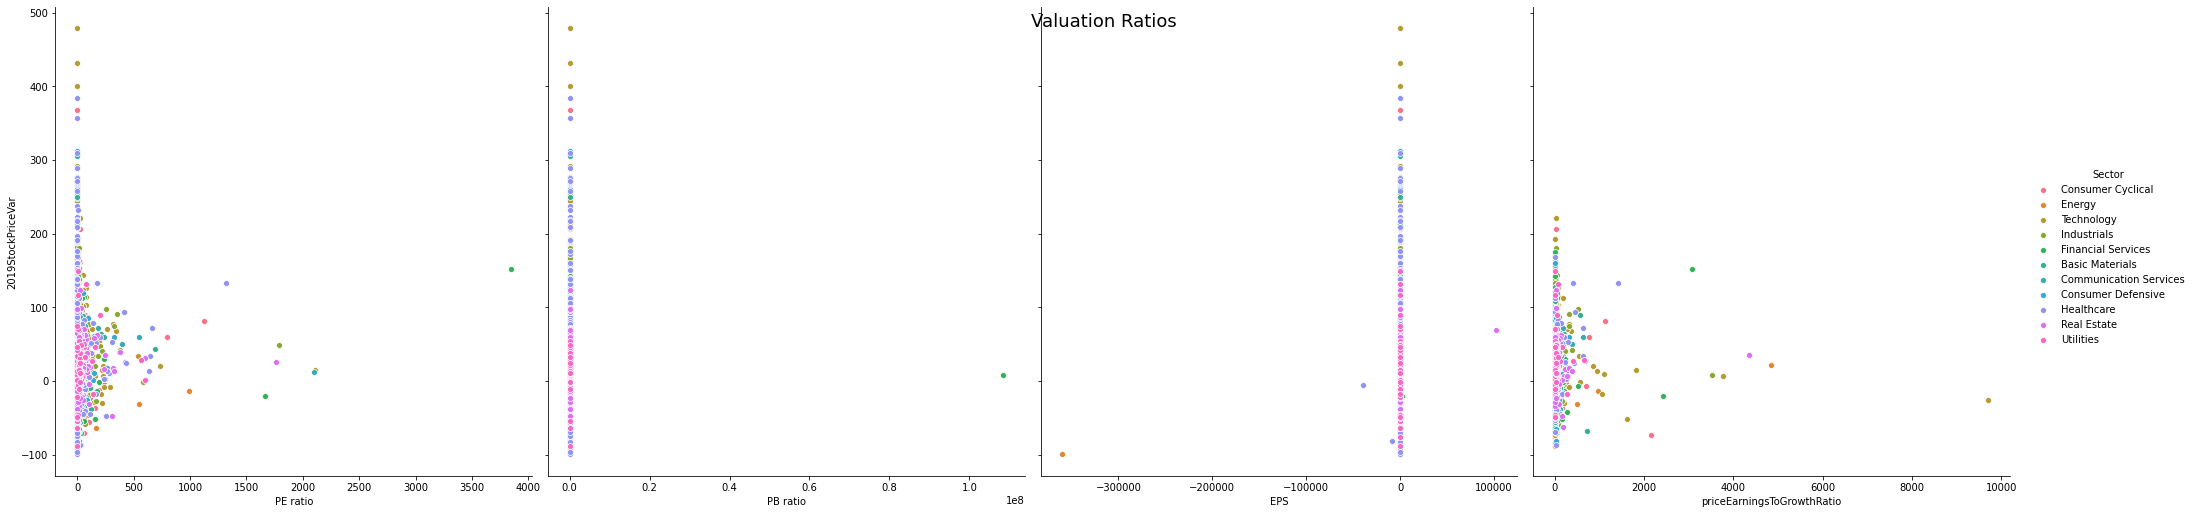

In [140]:
g5 = sns.pairplot(df_outlier,x_vars=['PE ratio', 'PB ratio', 'EPS', 'priceEarningsToGrowthRatio'], 
             y_vars='2019StockPriceVar',height=7, hue='Sector',palette='husl')
g5.fig.suptitle('Valuation Ratios',fontsize=18);

###Financial Analysis on one company. Analysis on other companies can be done in the same manner. 

In [142]:
# Take Apple as an example
df2014_AAPL = df2014[df2014['Company Name'] =='AAPL' ]
df2015_AAPL = df2015[df2015['Company Name'] =='AAPL' ]
df2016_AAPL = df2016[df2016['Company Name'] =='AAPL' ]
df2017_AAPL = df2017[df2017['Company Name'] =='AAPL' ]
df2018_AAPL = df2018[df2018['Company Name'] =='AAPL' ]

In [143]:
df2014_AAPL

,Company Name,currentRatio,quickRatio,Free Cash Flow margin,debtRatio,debtEquityRatio,cashFlowToDebtRatio,Return on Tangible Assets,Total Asset Turnover Ratio,Return on Total Assets Ratio,ROE,Gross Margin Ratio,Net Profit Ratio,EPS,EPS Diluted,PE ratio,PB ratio,priceEarningsToGrowthRatio,Sector,Class,2015StockPriceVar
3234,AAPL,1,1,0,0,0,2,2,1,0,0,0,0,6,6,15,5,14,Technology,0,-2


In [144]:
df_AAPL = df2014_AAPL.append([df2015_AAPL,df2016_AAPL,df2017_AAPL,df2018_AAPL])
list = [2014,2015,2016,2017,2018]
df_AAPL.insert(0,'Year',list)
df_AAPL.replace(np.nan, 0)
df_AAPL.index = [0,1,2,3,4]
df_AAPL.head()

,Year,Company Name,currentRatio,quickRatio,Free Cash Flow margin,debtRatio,debtEquityRatio,cashFlowToDebtRatio,Return on Tangible Assets,Total Asset Turnover Ratio,Return on Total Assets Ratio,ROE,Gross Margin Ratio,Net Profit Ratio,EPS,EPS Diluted,PE ratio,PB ratio,priceEarningsToGrowthRatio,Sector,Class,2015StockPriceVar,2016StockPriceVar,2017StockPriceVar,2018StockPriceVar,2019StockPriceVar
0,2014,AAPL,1,1,0,0,0,2,2,1,0,0,0,0,6,6,15,5,14,Technology,0,-2,nan,nan,nan,nan
1,2015,AAPL,1,1,0,0,1,1,2,1,0,0,0,0,9,9,12,5,11,Technology,1,nan,12,nan,nan,nan
2,2016,AAPL,1,1,0,0,1,1,1,1,0,0,0,0,8,8,14,5,13,Technology,1,nan,nan,48,nan,nan
3,2017,AAPL,1,1,0,0,1,1,1,1,0,0,0,0,9,9,17,6,16,Technology,0,nan,nan,nan,-7,nan
4,2018,AAPL,1,1,0,0,1,1,1,1,0,1,0,0,12,12,19,10,19,Technology,1,nan,nan,nan,nan,89


In [145]:
df_AAPL.columns.tolist()

['Year',
 'Company Name',
 'currentRatio',
 'quickRatio',
 'Free Cash Flow margin',
 'debtRatio',
 'debtEquityRatio',
 'cashFlowToDebtRatio',
 'Return on Tangible Assets',
 'Total Asset Turnover Ratio',
 'Return on Total Assets Ratio',
 'ROE',
 'Gross Margin Ratio',
 'Net Profit Ratio',
 'EPS',
 'EPS Diluted',
 'PE ratio',
 'PB ratio',
 'priceEarningsToGrowthRatio',
 'Sector',
 'Class',
 '2015StockPriceVar',
 '2016StockPriceVar',
 '2017StockPriceVar',
 '2018StockPriceVar',
 '2019StockPriceVar']

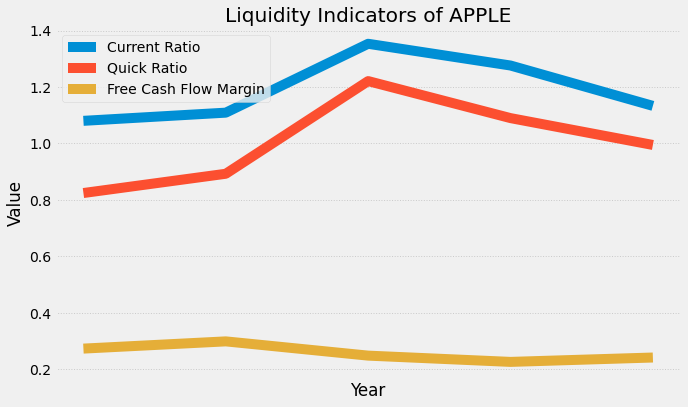

In [189]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
plt.style.use('fivethirtyeight')
plt.title('Liquidity Indicators of APPLE')
plt.grid(True, linestyle=':')
plt.xticks([2014,2015,2016,2017,2018])
plt.xlabel('Year')
plt.ylabel('Value')
plt.plot(df_AAPL['currentRatio'],label='Current Ratio',linewidth=10)
plt.plot(df_AAPL['quickRatio'],label='Quick Ratio',linewidth=10)
plt.plot(df_AAPL['Free Cash Flow margin'],label='Free Cash Flow Margin',linewidth=10)
plt.legend(loc=2);

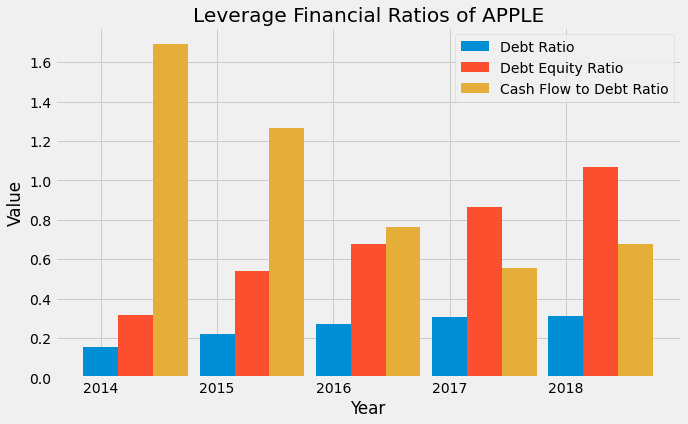

In [155]:
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 6
pos = np.arange(len(df_AAPL))
year = [2014,2015,2016,2017,2018]
plt.bar(pos,df_AAPL['debtRatio'],width = 0.3, label='Debt Ratio')
plt.bar(pos+0.3,df_AAPL['debtEquityRatio'],width = 0.3,label='Debt Equity Ratio')
plt.bar(pos+0.6,df_AAPL['cashFlowToDebtRatio'],width = 0.3,label='Cash Flow to Debt Ratio')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(pos,year)
plt.title('Leverage Financial Ratios of APPLE')
plt.legend();

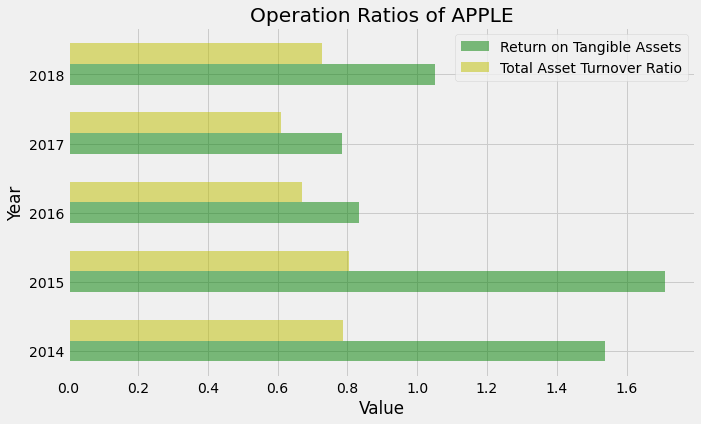

In [166]:
pos = np.arange(len(df_AAPL))
year = [2014,2015,2016,2017,2018]
plt.barh(pos,df_AAPL['Return on Tangible Assets'],height =0.3,alpha=0.5,color='g', label='Return on Tangible Assets')
plt.barh(pos+0.3,df_AAPL['Total Asset Turnover Ratio'],height =0.3,alpha=0.5,color='y', label='Total Asset Turnover Ratio')
plt.xlabel('Value')
plt.ylabel('Year')
plt.yticks(pos,year)
plt.title('Operation Ratios of APPLE')
plt.legend();

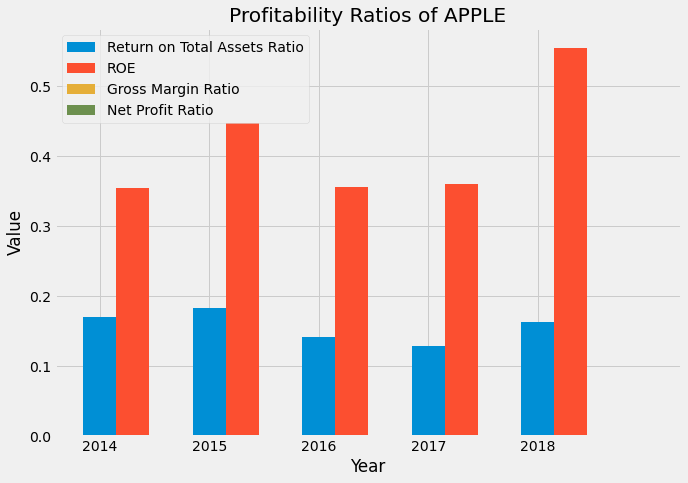

In [195]:
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 7
pos = np.arange(len(df_AAPL))
year = [2014,2015,2016,2017,2018]
plt.bar(pos,df_AAPL['Return on Total Assets Ratio'],width = 0.3, label='Return on Total Assets Ratio')
plt.bar(pos+0.3,df_AAPL['ROE'],width = 0.3,label='ROE')
plt.bar(pos+0.6,df_AAPL['Gross Margin Ratio'],width = 0.3,label='Gross Margin Ratio')
plt.bar(pos+0.9,df_AAPL['Net Profit Ratio'],width = 0.3,label='Net Profit Ratio')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(pos,year)
plt.title('Profitability Ratios of APPLE')
plt.legend(loc='upper left');

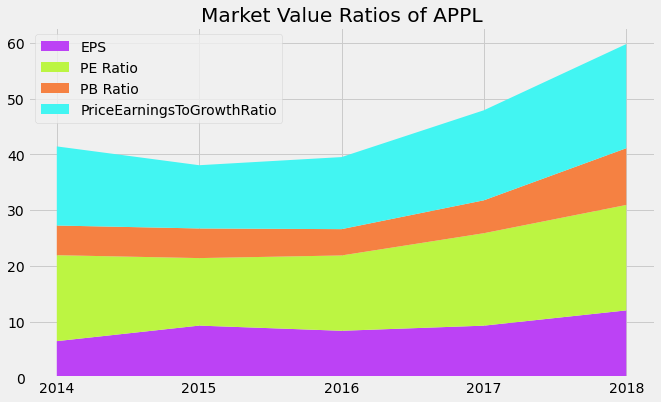

In [186]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title('Market Value Ratios of APPL')
ax.set_xticks([2014,2015,2016,2017,2018])
labels = ['EPS', 'PE Ratio','PB Ratio','PriceEarningsToGrowthRatio']
colors = ['#bc42f5','#bcf542', '#f58142','#42f5f2']
ax.stackplot(df_AAPL['Year'], df_AAPL['EPS'], df_AAPL['PE ratio'], df_AAPL['PB ratio'], df_AAPL['priceEarningsToGrowthRatio'],labels=labels, colors = colors)
ax.legend(loc='upper left')
plt.show()

### Regression Problem

Use df2018 as an example, column '2019StockPriceVar' as the target. 

In [196]:
# split df2018 dataset into training data and testing data. 
from sklearn.model_selection import train_test_split
train2018, test2018 = train_test_split(df2018, train_size = 0.80, test_size = 0.20,
                               random_state = 42)
train2018.shape, test2018.shape

((3355, 21), (839, 21))

*Find the baseline*

In [197]:
result = '2019StockPriceVar'
guess = df2018[result].mean()
print('{:,.2f}'.format(guess))

20.61


In [198]:
errors = guess - df2018['2019StockPriceVar']
mean_absolute_error = errors.abs().mean()
mean_absolute_error

34.685247977953885

In [199]:
print(f'If we just guessed the stock price variance for {guess:,.2f},')
print(f'we would get {mean_absolute_error:,.2f} error on average. ')

If we just guessed the stock price variance for 20.61,
we would get 34.69 error on average. 


*Modeling*

In [21]:
! pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.2MB/s 


In [290]:
X_train2018 = train2018.drop(columns=[result, 'Company Name'])
y_train2018 = train2018[result]
X_test2018 = test2018.drop(columns=[result,'Company Name'])
y_test2018 = test2018[result]
X_train2018.shape, y_train2018.shape, X_test2018.shape, y_test2018.shape

((3355, 19), (3355,), (839, 19), (839,))

In [227]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [291]:
encoder = ce.OrdinalEncoder()
imputer = SimpleImputer()
sc = StandardScaler()
X_train2018_enc = encoder.fit_transform(X_train2018)
X_test2018_enc = encoder.transform(X_test2018)
X_train2018_im = imputer.fit_transform(X_train2018_enc)
X_test2018_im = imputer.transform(X_test2018_enc)
X_train2018_sc = sc.fit_transform(X_train2018_im)
X_test2018_sc = sc.transform(X_test2018_im)

In [292]:
X_train2018_sc.shape, X_test2018_sc.shape

((3355, 19), (839, 19))

In [293]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [294]:
model.fit(X_train2018_sc, y_train2018)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
y_train2018_pred = model.predict(X_train2018_sc)
y_test2018_pred = model.predict(X_test2018_sc)

In [296]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train2018, y_train2018_pred)
mae_test = mean_absolute_error(y_test2018, y_test2018_pred)
print(f'MAE for train set is: {mae_train:,.2f} ')
print(f'MAE for test set is: {mae_test:,.2f} ')

MAE for train set is: 25.97 
MAE for test set is: 17,832.92 


In [297]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train2018, y_train2018_pred)
r2_train

0.29941908119603555

Looks normal, right? The R2 score is about 0.3, which means nearly 30% of the stock price variance can be explained by the linear regression model for the train set. Wait a second, why is that 'Class' column still there? What will happen if I drop that column? 

In [298]:
X_train2018_class = train2018.drop(columns=[result,'Class','Company Name'])
X_test2018_class = test2018.drop(columns=[result,'Class','Company Name'])
X_train2018_class.shape, X_test2018_class.shape

((3355, 18), (839, 18))

In [299]:
X_train2018_class_enc = encoder.fit_transform(X_train2018_class)
X_test2018_class_enc = encoder.transform(X_test2018_class)
X_train2018_class_im = imputer.fit_transform(X_train2018_class_enc)
X_test2018_class_im = imputer.transform(X_test2018_class_enc)
X_train2018_class_sc = sc.fit_transform(X_train2018_class_im)
X_test2018_class_sc = sc.transform(X_test2018_class_im)

In [300]:
model.fit(X_train2018_class_sc, y_train2018)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
y_train2018_class_pred = model.predict(X_train2018_class_sc)
y_test2018_class_pred = model.predict(X_test2018_class_sc)

In [302]:
r2_train_class = r2_score(y_train2018, y_train2018_class_pred)
r2_train_class

0.010412462218343688

In [303]:
coefficients = model.coef_
pd.Series(coefficients, X_train2018_class.columns.tolist())

currentRatio                   -0
quickRatio                      0
Free Cash Flow margin          -8
debtRatio                       2
debtEquityRatio                -0
cashFlowToDebtRatio             0
Return on Tangible Assets       3
Total Asset Turnover Ratio     -5
Return on Total Assets Ratio    4
ROE                            -9
Gross Margin Ratio              0
Net Profit Ratio                8
EPS                             0
EPS Diluted                     2
PE ratio                        1
PB ratio                       -9
priceEarningsToGrowthRatio     -1
Sector                         -0
dtype: float64

In [219]:
df2018all = df2018.drop(columns=['Company Name','Sector','Class'], axis=1)
df2018all.shape

(4194, 18)

In [223]:
plt.figure(figsize=(10,15))
df2018all.corr().iplot(kind='heatmap',colorscale="Blues",title="Features Correlation Matrix")

<Figure size 720x1080 with 0 Axes>

After removing the 'Class' column, we only get a R2 score of 0.01, which means that only 1.0% of the stock price variance can be explained by the linear regression model for the train set. Tremendou drop of R2 score means there is a data leakage. Therefore, 'Class' feature should not be used in real model.Meanwhile, it is easy for us to figure out that this linear regression model does not make too much sense to this dataset.
Furthermore, we are able to figure out that features and the target have very weak relationship based on above correlation matrix. 

In [313]:
!pip install shap

In [320]:
row = pd.DataFrame(X_test2018_class_sc).iloc[[1]]

In [315]:
y_test2018.iloc[[1]]

1358   48
Name: 2019StockPriceVar, dtype: float64

In [321]:
model.predict(row)

array([22.00838908])

*Shap Value Analysis*

In [322]:
import shap

In [332]:
explainer = shap.LinearExplainer(model,X_train2018_class_sc,feature_dependence="independent")
shap_values = explainer.shap_values(row)
shap_values

array([[ 4.92021731e-03, -1.05752538e-03, -3.59167340e-01,
        -6.12092217e-01, -1.45534451e-03, -1.86590343e-03,
        -7.51777215e-18,  1.48786587e+00,  8.04512801e-02,
        -3.39419686e-01, -9.30373206e-04,  1.60420345e-01,
         6.50013053e-03,  3.00445892e-02, -2.01134194e-01,
         2.88074582e-01,  2.23111913e-01,  2.17223927e-01]])

In [327]:
explainer.expected_value

21.026898800190114

In [335]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

### Classification Problem

Use the combined dataframe 'df'. Column 'Class' as the target. 'Class=0' means that the stock price will decrease in the following year. 'Class=1' means that the stock price will increase in the following year.

*Identify the baseline*

In [336]:
target = 'Class'
majority_class = df[target].mode()
majority_class

0    1
dtype: int64

In [337]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [338]:
df_pred = [majority_class] * len(df[target])
accuracy_score(df[target], df_pred)

0.5581813876391191

*Modeling*

In [339]:
train, test = train_test_split(df, train_size=0.80, test_size=0.20,
                               stratify=df['Class'],random_state=42)
train.shape, test.shape

((16892, 20), (4223, 20))

In [340]:
features_df = train.drop(columns=[target]).columns.tolist()
X_train = train[features_df]
y_train = train[target]
X_test = test[features_df]
y_test = test[target]

In [341]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.5, n_jobs=-1)
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Company Name', 'Sector'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Company Name',
                                          'data_type': dtype('O'),
                                          'mapping': SNCR        1
PGC         2
FSI         3
COG         4
MGYR        5
         ... 
HYACU    4782
HNRG     4783
MFD      4784
HPI      4785
NaN        -2
Length: 4786, dtype: int64},
                                         {'col': 'Sector',
                                          'data_type': dtype('O'),
                                          'map...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, lea

*Evaluation metrics*

In [342]:
y_pred = pipeline.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.5910490172862893


In [343]:
print(f'Accuracy of train set: {pipeline.score(X_train, y_train)}')
print(f'Accuracy of test set: {pipeline.score(X_test, y_test)}')

Accuracy of train set: 0.7003315178782856
Accuracy of test set: 0.5910490172862893


In [344]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Confusion Matrix of test set: \n {confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Classification report of test set: \n {classification_report(y_test, y_pred)}')

Confusion Matrix of test set: 
 [[ 735 1131]
 [ 596 1761]]


Classification report of test set: 
               precision    recall  f1-score   support

           0       0.55      0.39      0.46      1866
           1       0.61      0.75      0.67      2357

    accuracy                           0.59      4223
   macro avg       0.58      0.57      0.57      4223
weighted avg       0.58      0.59      0.58      4223



In [345]:
pipeline.predict_proba(X_test)

array([[0.38388377, 0.6161162 ],
       [0.24312824, 0.75687176],
       [0.52250606, 0.47749394],
       ...,
       [0.33879697, 0.661203  ],
       [0.49404854, 0.50595146],
       [0.26962584, 0.73037416]], dtype=float32)

In [346]:
pipeline.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1])

In [347]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [348]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [261]:
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0,0,2
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1966,1,1,0
1967,1,1,0
1968,1,1,0
1969,1,1,0


In [349]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.6184930204935607

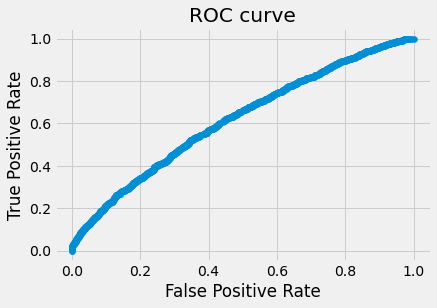

In [350]:
plt.figure(figsize=(6,4))
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

Permutation Importances 

In [351]:
!pip install eli5

In [352]:
transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

treemodel = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
treemodel.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [353]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    treemodel,
    scoring='accuracy',
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=42, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                   

In [354]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Sector                          0
Free Cash Flow margin           0
Net Profit Ratio                0
PB ratio                        0
EPS Diluted                     0
quickRatio                      0
debtEquityRatio                 0
priceEarningsToGrowthRatio      0
ROE                             0
currentRatio                    0
cashFlowToDebtRatio             0
PE ratio                        0
EPS                             0
debtRatio                       0
Company Name                    0
Return on Total Assets Ratio    0
Return on Tangible Assets      -0
Gross Margin Ratio             -0
Total Asset Turnover Ratio     -0
dtype: float64

In [355]:
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0151 ± 0.0028,Sector
0.0106 ± 0.0096,Free Cash Flow margin
0.0092 ± 0.0025,Net Profit Ratio
0.0062 ± 0.0026,PB ratio
0.0039 ± 0.0058,EPS Diluted
0.0026 ± 0.0014,quickRatio
0.0025 ± 0.0042,debtEquityRatio
0.0017 ± 0.0027,priceEarningsToGrowthRatio
0.0016 ± 0.0040,ROE
0.0015 ± 0.0028,currentRatio


*SHAP Values Analysis*

In [378]:
row2= X_test.iloc[[1]]

In [379]:
import shap

explainer = shap.TreeExplainer(treemodel)
row_processed = transformers.transform(row2)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row2, 
    link='logit' # For classification, this shows predicted probabilities
)